# RL tabular MM analysis
Set parameters, optionally run `mm_compare` with `--mm-type rl_tabular`, then plot PnL, rewards, actions, inventory, and spread.

In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)

# ---- parameters ----
run_simulation = True  # set True to launch a run from the notebook
run_simple_simulation = True  # set True to run simple MM
seed = 665
ticker = 'AAPL'
historical_date = '20000101'
start_time = '00:00:01'
end_time = '01:00:00'
mm_type = 'rl_tabular_2'  # use underscore for v2
simple_mm_type = 'simple'
log_name = f'rl_tabular_v2_seed_{seed}'
simple_log_name = f'simple_seed_{seed}'
repo_root = Path('..')
log_dir = repo_root / 'log' / log_name
simple_log_dir = repo_root / 'log' / simple_log_name
# --------------------

print('Log dir:', log_dir.resolve())
print('Simple log dir:', simple_log_dir.resolve())


Log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/log/rl_tabular_v2_seed_665
Simple log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/log/simple_seed_665


## Run simulation (optional)

In [2]:
if run_simulation:
    cmd = [
        'python', 'abides.py',
        '-c', 'mm_compare',
        '-t', ticker,
        '-d', historical_date,
        '--start-time', start_time,
        '--end-time', end_time,
        '--seed', str(seed),
        '--log_dir', log_name,
        '--mm-type', mm_type,
    ]
    print('Running RL tabular:', ' '.join(cmd))
    result = subprocess.run(cmd, cwd=repo_root)
    print('Return code:', result.returncode)
else:
    print('Skipping RL simulation; set run_simulation=True to execute.')

if run_simple_simulation:
    cmd_simple = [
        'python', 'abides.py',
        '-c', 'mm_compare',
        '-t', ticker,
        '-d', historical_date,
        '--start-time', start_time,
        '--end-time', end_time,
        '--seed', str(seed),
        '--log_dir', simple_log_name,
        '--mm-type', simple_mm_type,
    ]
    print('Running simple MM:', ' '.join(cmd_simple))
    result_simple = subprocess.run(cmd_simple, cwd=repo_root)
    print('Return code simple:', result_simple.returncode)
else:
    print('Skipping simple MM run; set run_simple_simulation=True to execute.')


Running RL tabular: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 01:00:00 --seed 665 --log_dir rl_tabular_v2_seed_665 --mm-type rl_tabular_2
ABIDES: Agent-Based Interactive Discrete Event Simulation



Traceback (most recent call last):
  File "/Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/abides.py", line 29, in <module>
    config = importlib.import_module('config.{}'.format(config_file),
  File "/Users/salim/miniconda3/envs/optimization/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/config/mm_compare.py", line 22, in

Return code: 1
Running simple MM: python abides.py -c mm_compare -t AAPL -d 20000101 --start-time 00:00:01 --end-time 01:00:00 --seed 665 --log_dir simple_seed_665 --mm-type simple
ABIDES: Agent-Based Interactive Discrete Event Simulation

Return code simple: 1


Traceback (most recent call last):
  File "/Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/abides.py", line 29, in <module>
    config = importlib.import_module('config.{}'.format(config_file),
  File "/Users/salim/miniconda3/envs/optimization/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/config/mm_compare.py", line 22, in

## Load logs

In [52]:
summary_path = log_dir / 'summary_log.bz2'
orderbook_file = next(log_dir.glob('ORDERBOOK_*_FULL.bz2'), None)
if not summary_path.exists():
    raise FileNotFoundError(summary_path)

summary = pd.read_pickle(summary_path)
summary.head()

,AgentID,AgentStrategy,EventType,Event
0,1,ValueAgent,STARTING_CASH,10000000.0
1,2,ValueAgent,STARTING_CASH,10000000.0
2,3,ValueAgent,STARTING_CASH,10000000.0
3,4,ValueAgent,STARTING_CASH,10000000.0
4,5,ValueAgent,STARTING_CASH,10000000.0


### Summary PnL by strategy

In [53]:
wide = summary.pivot_table(index=['AgentID', 'AgentStrategy'], columns='EventType', values='Event', aggfunc='first')
wide['PNL'] = wide['ENDING_CASH'] - wide['STARTING_CASH']
wide.reset_index().sort_values('PNL', ascending=False).head(10)

EventType,AgentID,AgentStrategy,ENDING_CASH,FINAL_CASH_POSITION,FINAL_VALUATION,STARTING_CASH,PNL
4,5,ValueAgent,10133179.0,6534259.0,-0.346574,10000000.0,133179.0
0,1,ValueAgent,10019222.0,10219162.0,0.021916,10000000.0,19222.0
3,4,ValueAgent,10015299.0,1517849.0,-0.838210,10000000.0,15299.0
2,3,ValueAgent,9989572.0,17187412.0,0.708736,10000000.0,-10428.0
5,6,RLTabularMarketMakerAgent,9945850.0,14244560.0,NaN,10000000.0,-54150.0
1,2,ValueAgent,9896878.0,10296758.0,0.029676,10000000.0,-103122.0


## RL tabular agent log

In [54]:
#rl_files = list(log_dir.glob('RL_TABULAR_MARKET_MAKER_AGENT_V2_*.bz2'))
#if not rl_files:
#    raise FileNotFoundError('No RL_TABULAR_MARKET_MAKER_AGENT logs found')
#rl_log = pd.read_pickle(rl_files[0])
#print('RL log columns:', list(rl_log.columns))
#rl_log.head()

### Simple MM log


In [55]:
#simple_files = list(simple_log_dir.glob('MARKET_MAKER_AGENT_*.bz2'))
#if simple_files:
#    simple_log = pd.read_pickle(simple_files[0])
#    print('Simple MM log columns:', list(simple_log.columns))
#    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE']
#else:
#    simple_state_rows = pd.DataFrame()
#    print('No simple MM log found')


### MTM comparison (RL vs simple)


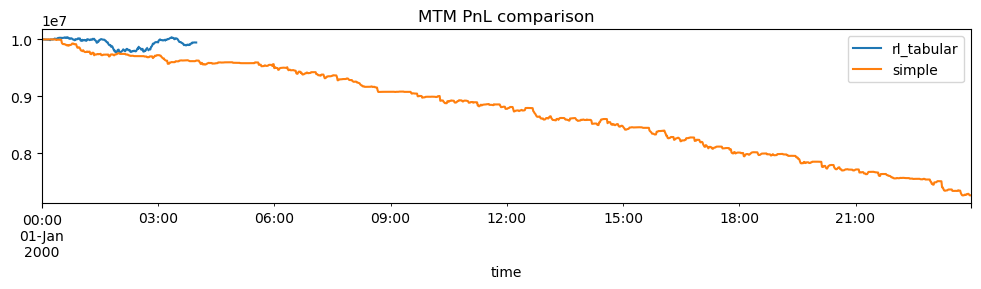

In [68]:
# MTM comparison (aligned on time index)
if 'state_rows' not in globals():
    rl_files = list(log_dir.glob('RL_TABULAR_MARKET_MAKER_AGENT_V2_*.bz2'))
    rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
    state_rows = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()
if 'simple_state_rows' not in globals():
    simple_files = list(simple_log_dir.glob('MARKET_MAKER_AGENT_*.bz2'))
    simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows.empty:
    rl_state = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if 'simple_state_rows' in globals() and not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

series = []
if rl_state is not None:
    series.append(rl_state['mtm'].rename('rl_tabular'))
if simple_state is not None:
    series.append(simple_state['mtm'].rename('simple'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1T').last()
    title = 'MTM PnL comparison' if len(series) > 1 else 'MTM PnL (RL only)'
    ax = df_resampled.plot(figsize=(10,3), title=title)
    plt.legend()
    plt.tight_layout()
else:
    print('No RL STATE events found; nothing to plot')


### Inventory comparison (RL vs simple)


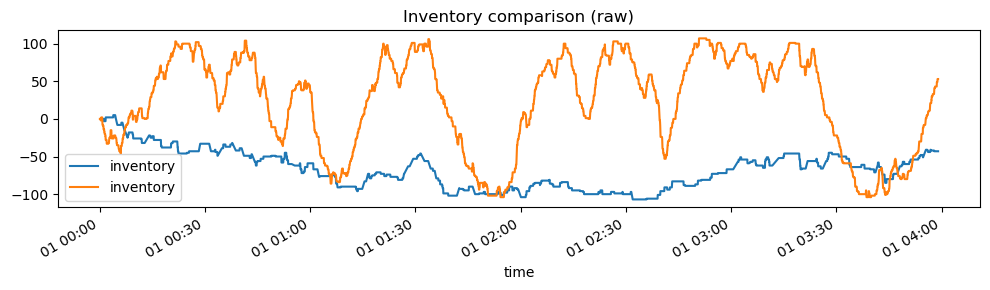

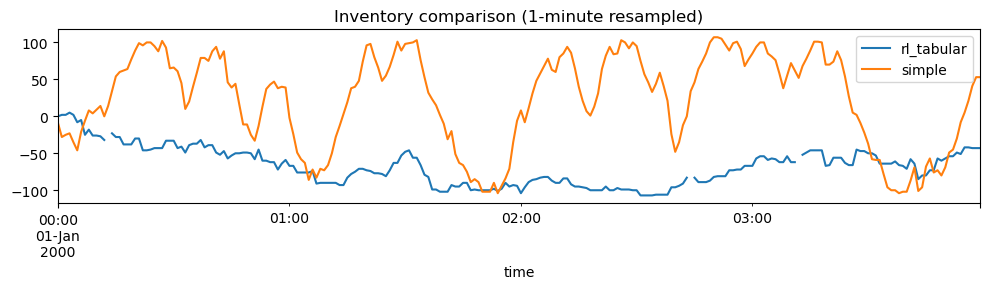

In [57]:
# Plot inventories on common time grid
# Recompute from logs to avoid re-use issues
rl_files = list(log_dir.glob('RL_TABULAR_MARKET_MAKER_AGENT_V2_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows_rl = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()

simple_state_rows = None
if 'simple_log_dir' in globals():
    simple_files = list(simple_log_dir.glob('MARKET_MAKER_AGENT_*.bz2'))
    simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows_rl.empty:
    rl_state = pd.DataFrame(list(state_rows_rl['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if simple_state_rows is not None and not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

# Plot raw inventories
if rl_state is not None:
    ax = rl_state[['inventory']].plot(figsize=(10,3), title='Inventory (raw)', label='rl_tabular')
    if simple_state is not None:
        simple_state[['inventory']].plot(ax=ax, label='simple')
    plt.legend()
    plt.tight_layout()
else:
    print('No RL STATE events found; nothing to plot')

# Aligned on 1-minute grid
series = []
if rl_state is not None:
    series.append(rl_state['inventory'].rename('rl_tabular'))
if simple_state is not None:
    series.append(simple_state['inventory'].rename('simple'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1T').last()
    title = 'Inventory comparison (1-minute resampled)' if len(series) > 1 else 'Inventory (1-minute resampled, RL only)'
    df_resampled.plot(figsize=(10,3), title=title)
    plt.legend()
    plt.tight_layout()
else:
    print('No inventory series available to plot')


### Inventory, cash, MTM, spread, actions

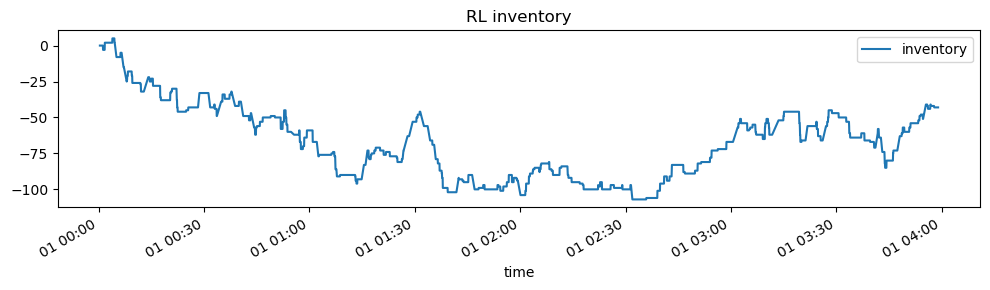

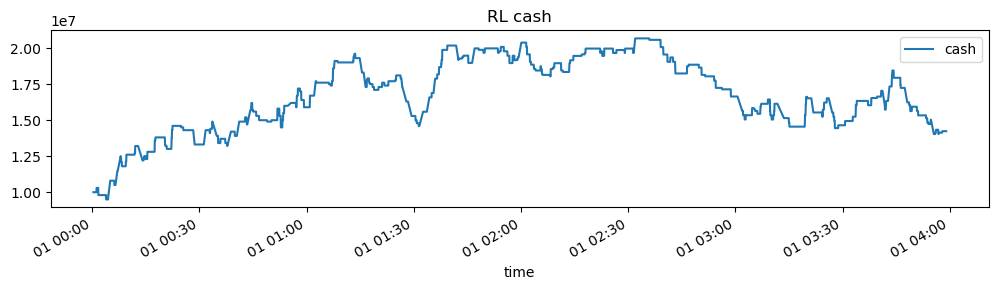

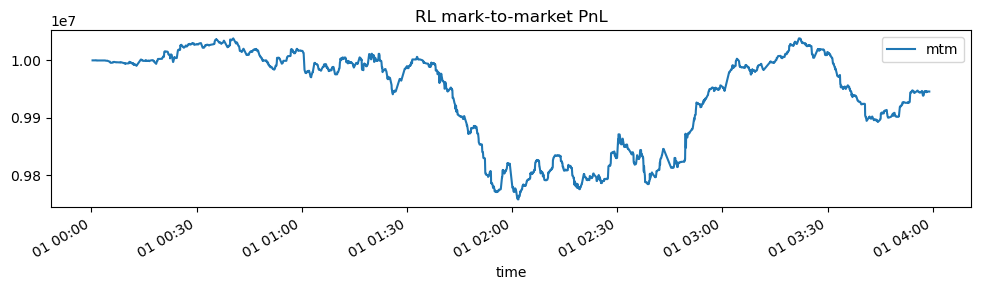

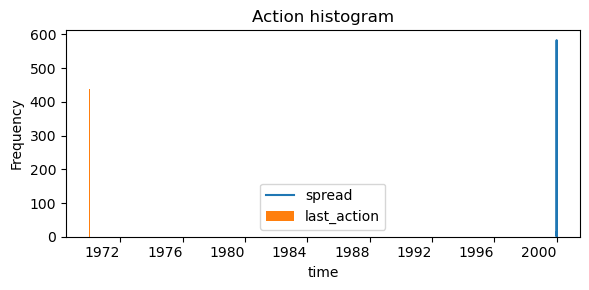

In [58]:
state_rows = rl_log[rl_log['EventType'] == 'STATE']
if not state_rows.empty:
    state_df = pd.DataFrame(list(state_rows['Event']))
    state_df = state_df.set_index('time')
    state_df.index = pd.to_datetime(state_df.index)
    state_df[['inventory']].plot(figsize=(10,3), title='RL inventory', legend=True)
    plt.tight_layout()
    state_df[['cash']].plot(figsize=(10,3), title='RL cash', legend=True)
    plt.tight_layout()
    state_df[['mtm']].plot(figsize=(10,3), title='RL mark-to-market PnL', legend=True)
    plt.tight_layout()
    state_df[['spread']].plot(figsize=(10,3), title='Spread observed by RL', legend=True)
    plt.tight_layout()
    state_df['last_action'].plot(kind='hist', bins=10, figsize=(6,3), title='Action histogram', label='last_action')
    plt.legend()
    plt.tight_layout()
else:
    print('No STATE events found in RL log')

### Spread over time (RL)


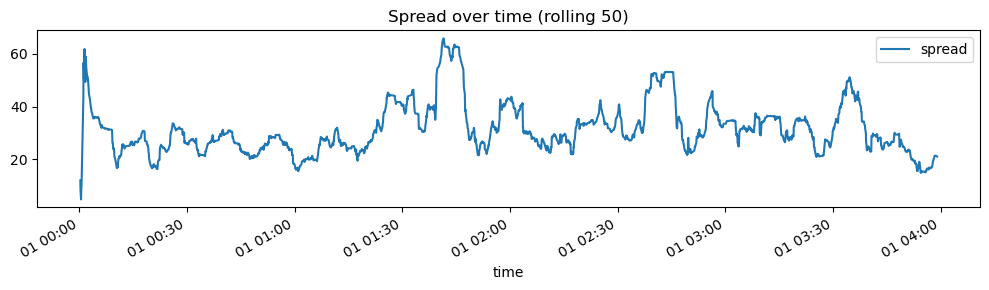

In [70]:
if not state_rows.empty and 'spread' in state_df.columns:
    spread_smoothed = state_df['spread'].rolling(window=100, min_periods=1).mean()
    spread_smoothed.plot(figsize=(10, 3), title='Spread over time (rolling 50)', legend=True)
    plt.tight_layout()
else:
    print('No spread data found in RL STATE events')


### Rewards and PnL per step

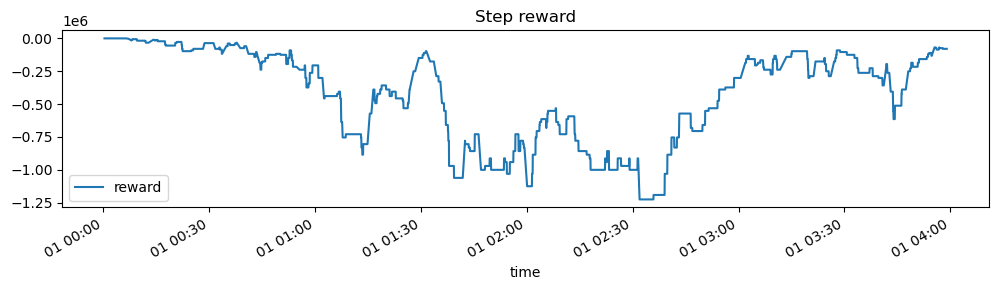

In [60]:
if not state_rows.empty:
    # Plot step reward
    state_df['reward'].plot(figsize=(10,3), title='Step reward', label='reward')
    plt.legend()
    plt.tight_layout()

    # Plot reward rolling mean (100)
    #state_df['reward'].rolling(window=100).mean().plot(figsize=(10,3), title='Reward rolling mean (100)', label='reward_roll100')
    #plt.legend()
    #plt.tight_layout()

    # Plot cumulative reward
    #state_df['cum_reward'].plot(figsize=(10,3), title='Cumulative reward', label='cum_reward')
    #plt.legend()
    #plt.tight_layout()

else:
    print('No STATE events found in RL log')


### Actions over time and Q proxy

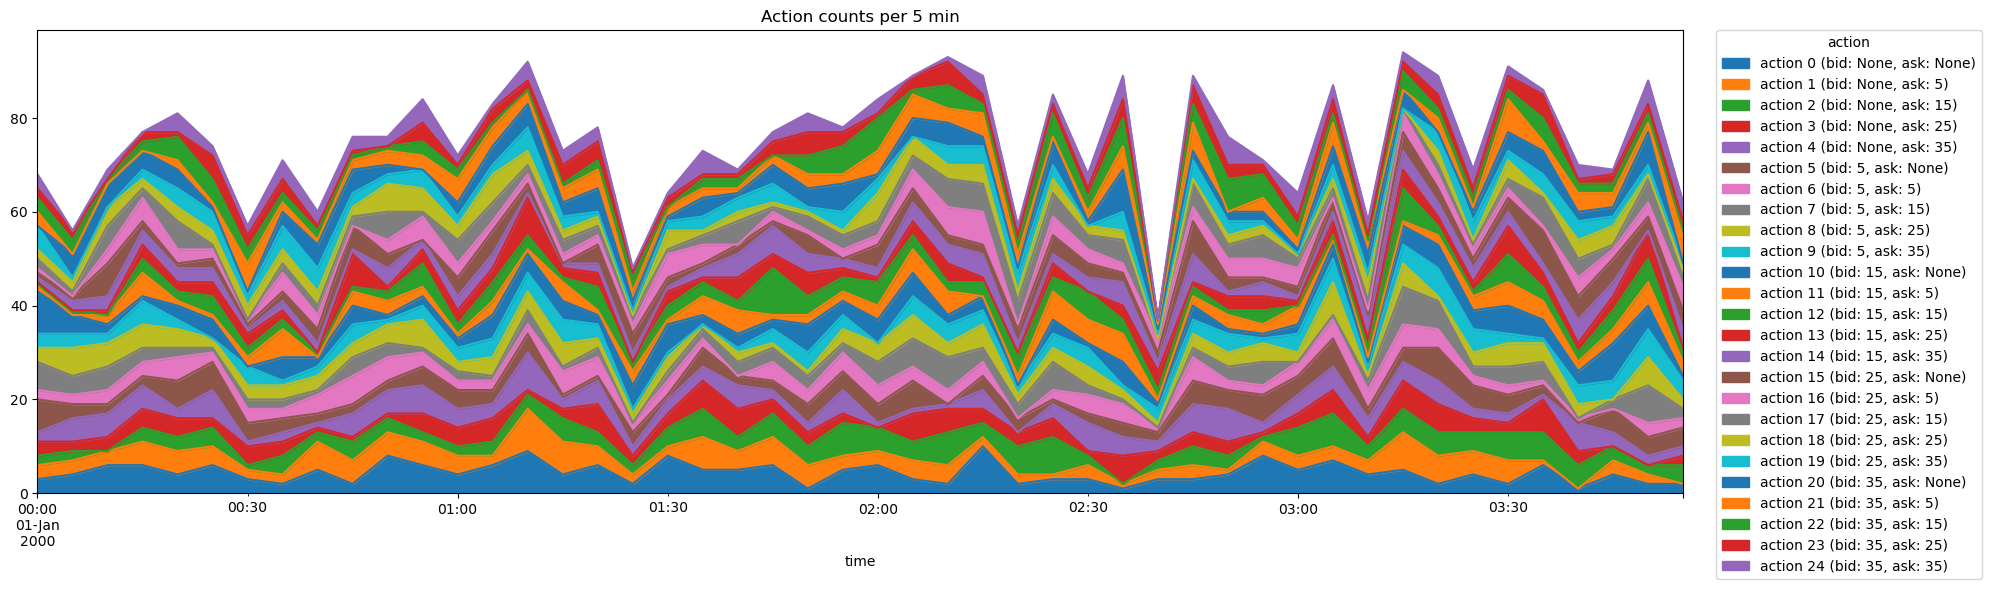

In [61]:
# Build action label map (matches RLTabularMarketMakerAgent order)
offsets = [None, 5, 15, 25, 35]
actions = [(b, a) for b in offsets for a in offsets]  # bid outer, ask inner
action_labels = {i: f"action {i} (bid: {b}, ask: {a})" for i, (b, a) in enumerate(actions)}

# Ensure datetime index
state_df = state_df.copy()
if 'time' in state_df.columns:
    state_df['time'] = pd.to_datetime(state_df['time'])
    state_df = state_df.set_index('time')
state_df = state_df.sort_index()

if not state_df.empty:
    # 5-minute action counts
    action_counts = (
        state_df['last_action']
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )
    # Rename columns to human-readable labels (drop any missing actions)
    action_counts = action_counts.rename(columns=action_labels)

    ax = action_counts.plot.area(figsize=(20, 6), title='Action counts per 5 min')
    ax.legend(title='action', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


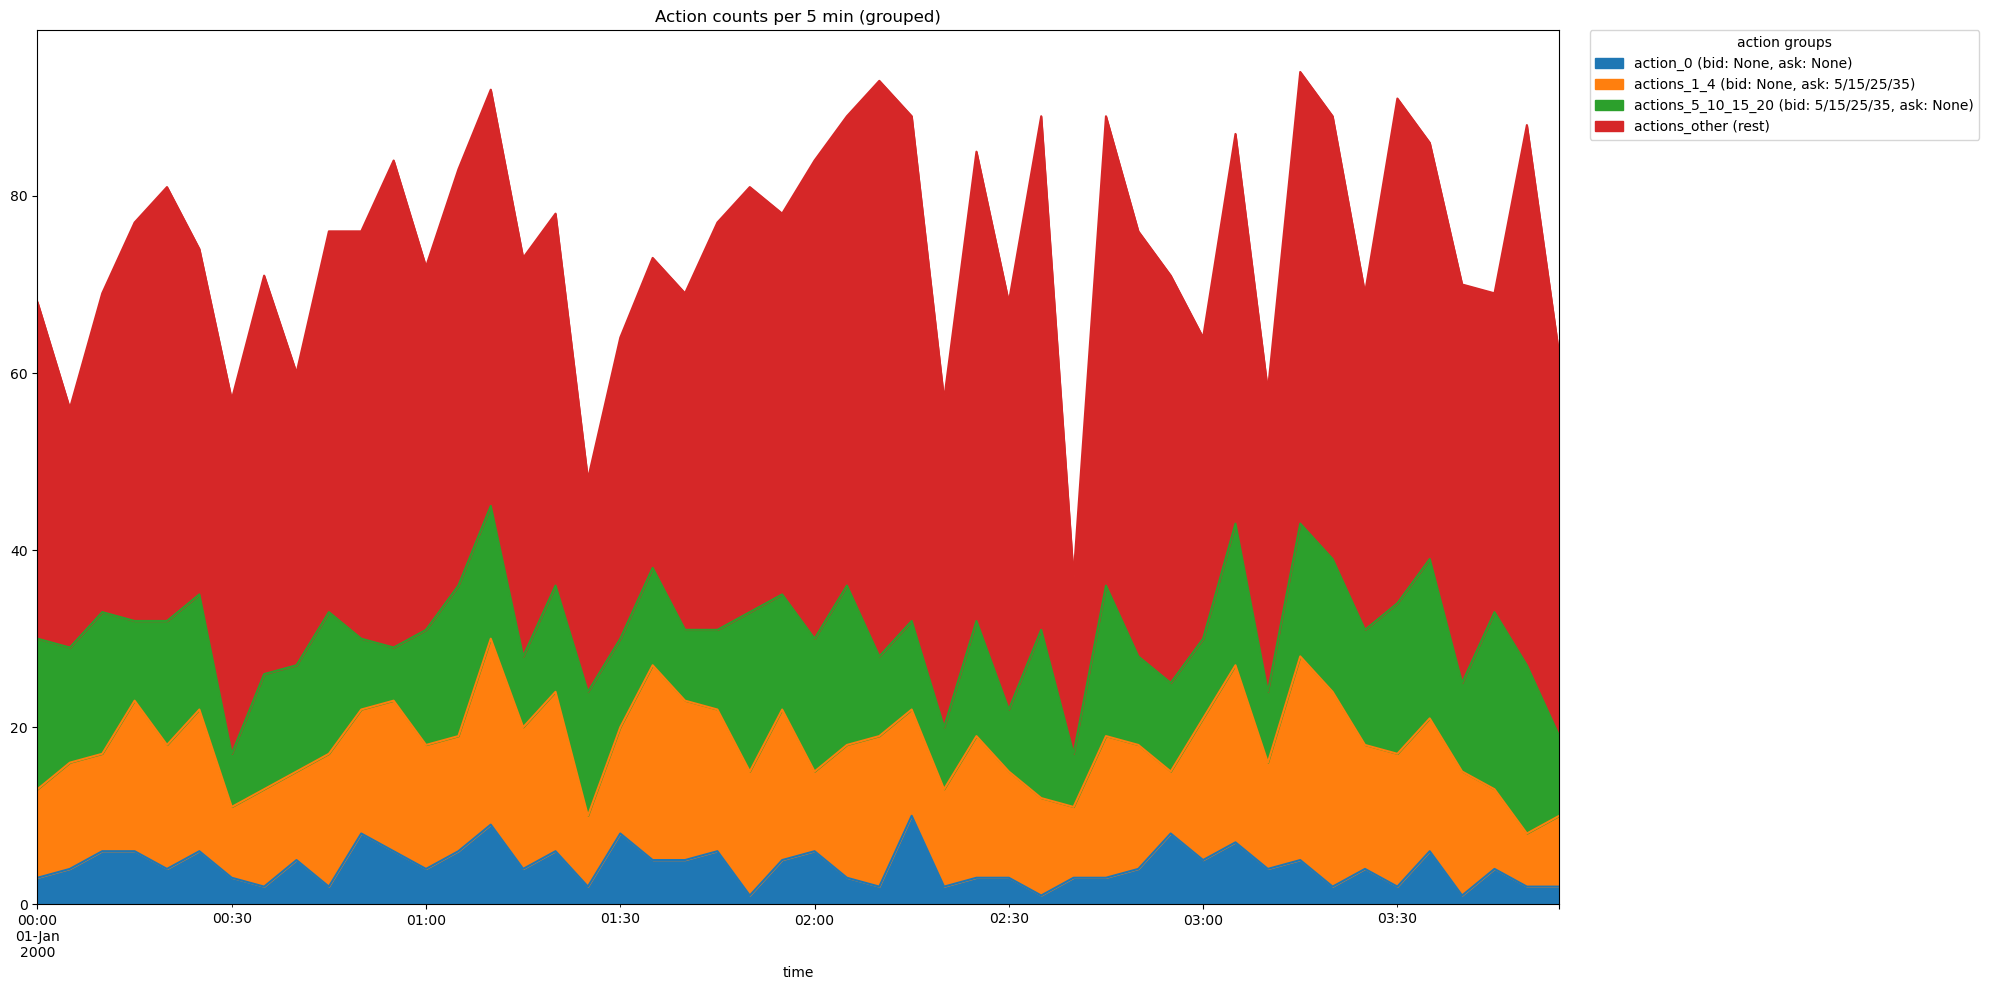

In [62]:
if not state_df.empty:
    action_counts = (
        state_df['last_action']
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )

    def sum_cols(df, cols):
        cols = [c for c in cols if c in df.columns]
        return df[cols].sum(axis=1) if cols else pd.Series(0, index=df.index)

    grouped = pd.DataFrame({
        'action_0 (bid: None, ask: None)': sum_cols(action_counts, [0]),
        'actions_1_4 (bid: None, ask: 5/15/25/35)': sum_cols(action_counts, [1, 2, 3, 4]),
        'actions_5_10_15_20 (bid: 5/15/25/35, ask: None)': sum_cols(action_counts, [5, 10, 15, 20]),
        'actions_other (rest)': sum_cols(
            action_counts,
            [c for c in action_counts.columns if c not in {0, 1, 2, 3, 4, 5, 10, 15, 20}]
        ),
    })

    palette = {
        'action_0 (bid: None, ask: None)': '#1f77b4',
        'actions_1_4 (bid: None, ask: 5/15/25/35)': '#ff7f0e',
        'actions_5_10_15_20 (bid: 5/15/25/35, ask: None)': '#2ca02c',
        'actions_other (rest)': '#d62728',
    }

    ax = grouped.plot.area(
        figsize=(20, 10),
        color=[palette[c] for c in grouped.columns],
        title='Action counts per 5 min (grouped)',
    )
    ax.legend(title='action groups', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


### State visitation heatmap

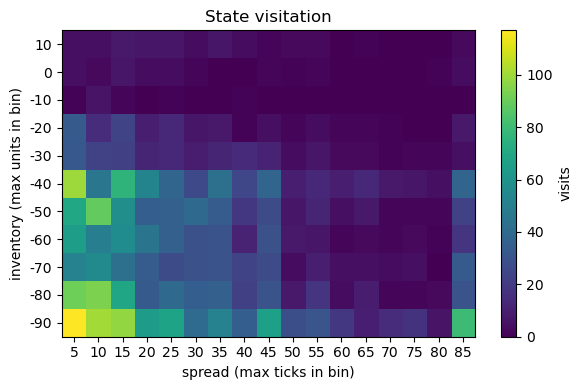

In [72]:
spread_bin_size = 5      # ticks
inventory_bin_size = 10  # shares (or whatever your unit is)

if not state_rows.empty:
    visit = (
        state_df.groupby(['inventory_bin', 'spread_bin'])
                .size()
                .unstack(fill_value=0)
                .sort_index()
    )
    inv_bins = visit.index.values
    spr_bins = visit.columns.values

    spr_labels = [(b + 1) * spread_bin_size for b in spr_bins]          # max spread ticks in bin
    inv_labels = [(b + 1) * inventory_bin_size for b in inv_bins]       # max inventory units in bin

    plt.figure(figsize=(6, 4))
    plt.imshow(
        visit.values,
        origin='lower',
        aspect='auto',
        extent=[spr_bins.min() - 0.5, spr_bins.max() + 0.5,
                inv_bins.min() - 0.5, inv_bins.max() + 0.5],
    )
    plt.colorbar(label='visits')
    plt.xticks(ticks=spr_bins, labels=spr_labels)
    plt.yticks(ticks=inv_bins, labels=inv_labels)
    plt.xlabel('spread (max ticks in bin)')
    plt.ylabel('inventory (max units in bin)')
    plt.title('State visitation')
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


In [64]:
state_df[['inventory', 'inventory_bin']].head()
state_df['inventory_bin'].min(), state_df['inventory_bin'].max()
state_df['inventory_bin'].unique()  # should include negatives


array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10])

## Order book and fundamental

Orderbook columns: [98311, 98319, 98321, 98331, 98342, 98347, 98348, 98349, 98350, 98351, 98352, 98353, 98354, 98356, 98359, 98361, 98362, 98366, 98371, 98381, 98386, 98391, 98392, 98406, 98407, 98409, 98410, 98415, 98418, 98419, 98432, 98439, 98440, 98442, 98443, 98446, 98452, 98456, 98462, 98463, 98464, 98465, 98466, 98467, 98468, 98469, 98471, 98472, 98473, 98474, 98475, 98477, 98478, 98479, 98481, 98482, 98484, 98485, 98487, 98489, 98490, 98491, 98492, 98494, 98495, 98498, 98499, 98500, 98501, 98502, 98503, 98504, 98505, 98507, 98508, 98509, 98511, 98513, 98515, 98516, 98519, 98521, 98522, 98524, 98525, 98527, 98530, 98531, 98532, 98533, 98534, 98535, 98536, 98539, 98540, 98541, 98543, 98544, 98546, 98547, 98550, 98551, 98552, 98553, 98554, 98555, 98556, 98557, 98558, 98559, 98560, 98561, 98562, 98563, 98564, 98565, 98566, 98567, 98568, 98569, 98570, 98571, 98572, 98573, 98574, 98575, 98577, 98578, 98579, 98580, 98581, 98582, 98584, 98585, 98586, 98587, 98588, 98589, 98590, 98591, 

,98311,98319,98321,98331,98342,98347,98348,98349,98350,98351,...,102398,102399,102403,102407,102409,102414,102417,102428,102441,102475
QuoteTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:01.003102816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.005932022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.009971456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.011360742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-01 00:00:01.014279187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


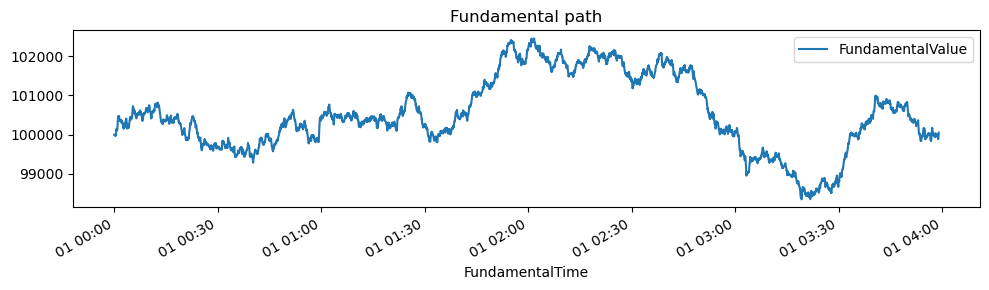

In [65]:
if orderbook_file:
    orderbook = pd.read_pickle(orderbook_file)
    print('Orderbook columns:', list(orderbook.columns))
    def find_col(columns, substrings):
        for col in columns:
            name = ' '.join(col) if isinstance(col, tuple) else str(col)
            lname = name.lower()
            if all(sub in lname for sub in substrings):
                return col
        return None
    bid_price_col = find_col(orderbook.columns, ['best', 'bid']) or find_col(orderbook.columns, ['bid', 'price'])
    ask_price_col = find_col(orderbook.columns, ['best', 'ask']) or find_col(orderbook.columns, ['ask', 'price'])
    if bid_price_col and ask_price_col:
        top = orderbook[[bid_price_col, ask_price_col]].copy()
        top.columns = ['best_bid_price', 'best_ask_price']
        top['mid'] = (top['best_bid_price'] + top['best_ask_price']) / 2
        top['spread'] = top['best_ask_price'] - top['best_bid_price']
        top[['mid']].plot(figsize=(10,3), title='Mid price', legend=True)
        plt.tight_layout()
        top[['spread']].plot(figsize=(10,3), title='Quoted spread', legend=True)
        plt.tight_layout()
    else:
        display(orderbook.head())
else:
    print('Orderbook file not found')

fund_file = next(log_dir.glob('fundamental_*.bz2'), None)
if fund_file:
    fundamental = pd.read_pickle(fund_file).reset_index()
    fundamental.plot(x='FundamentalTime', y='FundamentalValue', legend=True, figsize=(10,3), title='Fundamental path')
    plt.tight_layout()
else:
    print('Fundamental file not found')

### Q-values over time


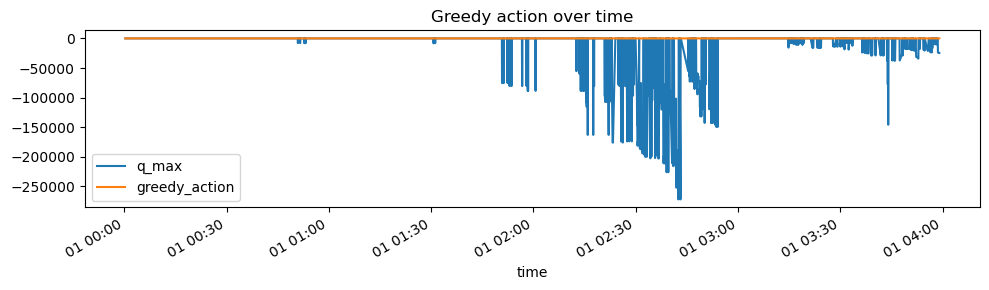

In [66]:
if not state_rows.empty and 'q_max' in state_df.columns:
    state_df['q_max'].plot(figsize=(10,3), title='Max Q for current state', label='q_max')
    plt.legend()
    plt.tight_layout()
    if 'greedy_action' in state_df.columns:
        state_df['greedy_action'].plot(figsize=(10,3), title='Greedy action over time', label='greedy_action')
        plt.legend()
        plt.tight_layout()
else:
    print('No Q info in STATE events')
